# Binary classification of STEMI/NSTEMI patients

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Pre-processing

In [53]:
raw_data = pd.read_excel('../Datasets/STEMI_NSTEMI_DATASET_new.xlsx')
raw_data = raw_data.drop(columns=["Patients"])
raw_data

,time1,concentration1,pa mmhg,pv mmHg,fc bpm,frazione di eiezione (fe),diabete,dislipidemia,familiarita,fumo,obesita,ia,pregresso_ima,emoglobina,globuli_rossi,classe
0,7.133333,1.430,135,80,72,51.0,0.0,0,0,1,0,1,0,14.0,4.79,0
1,5.233333,2.200,105,75,80,41.0,0.0,0,0,1,0,0,0,16.3,4.70,0
2,14.450000,17.790,140,90,78,40.0,1.0,1,0,1,0,1,0,15.4,4.61,0
3,3.016667,0.440,132,75,66,42.5,0.0,0,0,0,0,0,1,16.5,5.37,0
4,6.216667,0.707,125,65,70,47.2,0.0,0,0,1,0,0,0,16.7,5.28,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,31.650000,2.560,116,75,75,50.0,NaN,0,1,0,0,1,0,15.6,4.94,1
76,43.950000,0.289,140,60,62,47.5,0.0,1,0,0,0,0,0,12.9,4.45,1
77,18.016667,8.490,125,80,83,55.0,0.0,1,0,1,0,1,0,13.7,4.43,1
78,35.750000,0.318,112,65,67,55.0,0.0,0,0,1,0,0,0,16.8,4.74,1


In [54]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   time1                      80 non-null     float64
 1   concentration1             80 non-null     float64
 2   pa mmhg                    80 non-null     int64  
 3   pv mmHg                    80 non-null     int64  
 4   fc bpm                     80 non-null     int64  
 5   frazione di eiezione (fe)  80 non-null     float64
 6   diabete                    79 non-null     float64
 7   dislipidemia               80 non-null     int64  
 8   familiarita                80 non-null     int64  
 9   fumo                       80 non-null     int64  
 10  obesita                    80 non-null     int64  
 11  ia                         80 non-null     int64  
 12  pregresso_ima              80 non-null     int64  
 13  emoglobina                 80 non-null     float64
 

In [3]:
#check null values
raw_data.isnull().sum()

time1                        0
concentration1               0
pa mmhg                      0
pv mmHg                      0
fc bpm                       0
frazione di eiezione (fe)    0
diabete                      1
dislipidemia                 0
familiarita                  0
fumo                         0
obesita                      0
ia                           0
pregresso_ima                0
emoglobina                   0
globuli_rossi                0
classe                       0
dtype: int64

In [55]:
#impute null value with mean
raw_data = raw_data.dropna()

#raw_data['diabete']=raw_data['diabete'].fillna(raw_data['diabete'].mean())
#raw_data.info()

In [56]:
#getting features and labels
X = np.asarray(raw_data.drop(columns=['classe']))
y = np.asarray(raw_data[['classe']])

<Axes: ylabel='Count'>

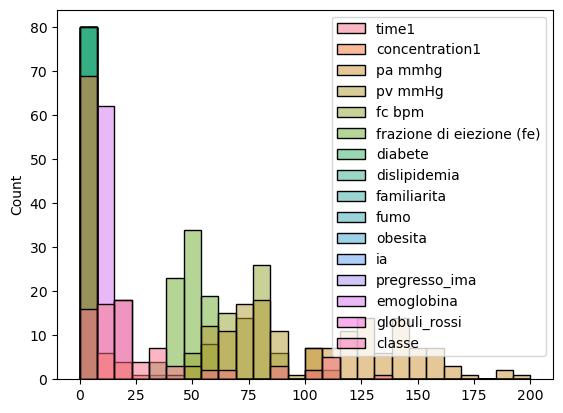

In [10]:
sns.histplot(raw_data)

In [13]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

metrics = ['accuracy', 'f1', 'precision', 'recall']
estimators = {'NB': GaussianNB(), 'LR': LogisticRegression(), 'KNN': KNeighborsClassifier(), 'SVM': SVC(), 'DT': DecisionTreeClassifier(), 'RF':RandomForestClassifier()}

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [ ]:
accuracy_c = {'NB':[], 'LR':[], 'KNN':[], 'SVM':[], 'DT':[], 'RF':[]}
f1_c = {'NB':[], 'LR':[], 'KNN':[], 'SVM':[], 'DT':[], 'RF':[]}
precision_c = {'NB':[], 'LR':[], 'KNN':[], 'SVM':[], 'DT':[], 'RF':[]}
recall_c = {'NB':[], 'LR':[], 'KNN':[], 'SVM':[], 'DT':[], 'RF':[]}
scores_dfs = {'NB':[], 'LR':[], 'KNN':[], 'SVM':[], 'DT':[], 'RF':[]}

for clf in estimators.keys():
    scores = cross_validate(estimators[clf], X_train, y_train, scoring=metrics, cv=10, return_train_score=True)
    accuracy_c[clf].append(scores['test_accuracy'])
    f1_c[clf].append(scores['test_f1'])
    precision_c[clf].append(scores['test_precision'])
    recall_c[clf].append(scores['test_recall'])
    scores_dfs[clf].append(pd.DataFrame(scores))

In [57]:
from sklearn.metrics import accuracy_score

def perf_measure(y_actual, y_hat):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==1:
           TP += 1
        if y_hat[i]==1 and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==0:
           TN += 1
        if y_hat[i]==0 and y_actual[i]!=y_hat[i]:
           FN += 1
    if TP + FP == 0:
      print(TP, FP, TN, FN, y_actual, y_hat)
    return(TP, FP, TN, FN)


def Metriche(y_test, y_hat):    
    # TP, TN, FP, FN, 
    #tn, fp, fn, tp = confusion_matrix(y_test, y_hat).ravel()
    tp, fp, tn, fn = perf_measure(y_test, y_hat)
    Sensitivity = tp / (tp + fn)
    Specificity = tn / (tn + fp)
    Precision = tp/(tp+fp)
    f1 = f1_score(y_test, y_hat)
    accuracy = accuracy_score(y_test, y_hat)    
    return (tn, fp, fn, tp, Sensitivity, Specificity, Precision, f1, accuracy)


def UpdateF(feature_freq,fs):
    for f in fs:
        feature_freq[f] += 1	
    return feature_freq

In [58]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LogisticRegression


def Classificazione(X_train_new, X_test_new, y_train_new, y_test_new):
  
    TP = []
    TN = []
    FP = []
    FN = []
    Sensitivity = []
    Specificity = []
    Precision = []
    f1Score = []
    Accuracy = []

    #Support Vector Machine

    # Nonlinear function
    model_p = svm.SVC(kernel = 'poly')
    model_p.fit(X_train_new, y_train_new)
    y_pred = model_p.predict(X_test_new)
    tn, fp, fn, tp, sensitivity, specificity, precision, f1, accuracy = Metriche(y_test_new, y_pred)
    TP.append(tp)
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    Sensitivity.append(sensitivity)
    Specificity.append(specificity)
    Precision.append(precision)
    f1Score.append(f1)
    Accuracy.append(accuracy)

    # Linear function
    model_l = svm.SVC(kernel = 'linear')
    model_l.fit(X_train_new, y_train_new)
    y_pred = model_l.predict(X_test_new)
    tn, fp, fn, tp, sensitivity, specificity, precision, f1, accuracy = Metriche(y_test_new, y_pred)
    TP.append(tp)
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    Sensitivity.append(sensitivity)
    Specificity.append(specificity)
    Precision.append(precision)
    f1Score.append(f1)
    Accuracy.append(accuracy)

    # Random Forest Classifier
    model_rf=RandomForestClassifier()
    model_rf.fit(X_train_new,y_train_new)
    y_pred=model_rf.predict(X_test_new)
    tn, fp, fn, tp, sensitivity, specificity, precision, f1, accuracy = Metriche(y_test_new, y_pred)
    TP.append(tp)
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    Sensitivity.append(sensitivity)
    Specificity.append(specificity)
    Precision.append(precision)
    f1Score.append(f1)
    Accuracy.append(accuracy)

    # Extra Trees Classifier
    model_etc=ExtraTreesClassifier()
    model_etc.fit(X_train_new,y_train_new)
    y_pred=model_etc.predict(X_test_new)
    tn, fp, fn, tp, sensitivity, specificity, precision, f1, accuracy = Metriche(y_test_new, y_pred)
    TP.append(tp)
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    Sensitivity.append(sensitivity)
    Specificity.append(specificity)
    Precision.append(precision)
    f1Score.append(f1)
    Accuracy.append(accuracy)

    # Decision Tree
    clf_dt = DecisionTreeRegressor()
    clf_dt.fit(X_train_new,y_train_new)
    y_pred = clf_dt.predict(X_test_new)
    tn, fp, fn, tp, sensitivity, specificity, precision, f1, accuracy = Metriche(y_test_new, y_pred)
    TP.append(tp)
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    Sensitivity.append(sensitivity)
    Specificity.append(specificity)
    Precision.append(precision)
    f1Score.append(f1)
    Accuracy.append(accuracy)

    # Logistic Regression
    logisticRegr = LogisticRegression()
    logisticRegr.fit(X_train_new,y_train_new)
    y_pred = logisticRegr.predict(X_test_new)
    tn, fp, fn, tp, sensitivity, specificity, precision, f1, accuracy = Metriche(y_test_new, y_pred)
    TP.append(tp)
    TN.append(tn)
    FP.append(fp)
    FN.append(fn)
    Sensitivity.append(sensitivity)
    Specificity.append(specificity)
    Precision.append(precision)
    f1Score.append(f1)
    Accuracy.append(accuracy)

    return TP, FP, TN, FN, Sensitivity, Specificity, Precision, f1Score, Accuracy

In [60]:
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import StandardScaler

def SelezioneClassificazione(X_table, Y_table, N, feature_freq, model,columnsName):
  
    TP_c = {"RF": [], "SVML": [], "SVMP": [], "DT": [], "ET": [], "LR": []}
    TN_c = {"RF": [], "SVML": [], "SVMP": [], "DT": [], "ET": [], "LR": []}
    FP_c = {"RF": [], "SVML": [], "SVMP": [], "DT": [], "ET": [], "LR": []}
    FN_c = {"RF": [], "SVML": [], "SVMP": [], "DT": [], "ET": [], "LR": []}
    Sensitivity_c = {"RF": [], "SVML": [], "SVMP": [], "DT": [], "ET": [], "LR": []}
    Specificity_c = {"RF": [], "SVML": [], "SVMP": [], "DT": [], "ET": [], "LR": []}
    Precision_c = {"RF": [], "SVML": [], "SVMP": [], "DT": [], "ET": [], "LR": []}
    f1Score_c = {"RF": [], "SVML": [], "SVMP": [], "DT": [], "ET": [], "LR": []}
    Accuracy_c = {"RF": [], "SVML": [], "SVMP": [], "DT": [], "ET": [], "LR": []}
    
    skf = StratifiedShuffleSplit(n_splits=N, random_state=None, test_size=0.25)
    X = X_table
    y = Y_table

    for train_index, test_index in skf.split(X, y):
        stdsc = StandardScaler()

     # 1. Dataset splitting: identificazione dei gruppi di training e test, per i vettori delle variabili e delle classi
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        y_test = y_test.ravel()
        y_train = y_train.ravel()
        X_train_scaled = stdsc.fit_transform(X_train)
        X_test_scaled = stdsc.fit_transform(X_test)
        
        model.fit(X_train_scaled, y_train)
        selezionate = model.get_feature_names_out(columnsName)
        UpdateF(feature_freq, selezionate)
        X_train_new = model.transform(X_train_scaled)
        X_test_new = model.transform(X_test_scaled)        

        TP, FP, TN, FN, Sensitivity, Specificity, Precision, f1Score, Accuracy = Classificazione(X_train_new, X_test_new, y_train, y_test)                   
        
        TP_c["SVMP"].append(TP[0])
        TP_c["SVML"].append(TP[1])
        TP_c["RF"].append(TP[2])
        TP_c["ET"].append(TP[3])
        TP_c["DT"].append(TP[4])
        TP_c["LR"].append(TP[5])

        TN_c["SVMP"].append(TN[0])
        TN_c["SVML"].append(TN[1])
        TN_c["RF"].append(TN[2])
        TN_c["ET"].append(TN[3])
        TN_c["DT"].append(TN[4])
        TN_c["LR"].append(TN[5])

        FP_c["SVMP"].append(FP[0])
        FP_c["SVML"].append(FP[1])
        FP_c["RF"].append(FP[2])
        FP_c["ET"].append(FP[3])
        FP_c["DT"].append(FP[4])
        FP_c["LR"].append(FP[5])

        FN_c["SVMP"].append(FN[0])
        FN_c["SVML"].append(FN[1])
        FN_c["RF"].append(FN[2])
        FN_c["ET"].append(FN[3])
        FN_c["DT"].append(FN[4])
        FN_c["LR"].append(FN[5])

        Sensitivity_c["SVMP"].append(Sensitivity[0])
        Sensitivity_c["SVML"].append(Sensitivity[1])
        Sensitivity_c["RF"].append(Sensitivity[2])
        Sensitivity_c["ET"].append(Sensitivity[3])
        Sensitivity_c["DT"].append(Sensitivity[4])
        Sensitivity_c["LR"].append(Sensitivity[5])

        Specificity_c["SVMP"].append(Specificity[0])
        Specificity_c["SVML"].append(Specificity[1])
        Specificity_c["RF"].append(Specificity[2])
        Specificity_c["ET"].append(Specificity[3])
        Specificity_c["DT"].append(Specificity[4])
        Specificity_c["LR"].append(Specificity[5])

        Precision_c["SVMP"].append(Precision[0])
        Precision_c["SVML"].append(Precision[1])
        Precision_c["RF"].append(Precision[2])
        Precision_c["ET"].append(Precision[3])
        Precision_c["DT"].append(Precision[4])
        Precision_c["LR"].append(Precision[5])

        f1Score_c["SVMP"].append(f1Score[0])
        f1Score_c["SVML"].append(f1Score[1])
        f1Score_c["RF"].append(f1Score[2])
        f1Score_c["ET"].append(f1Score[3])
        f1Score_c["DT"].append(f1Score[4])
        f1Score_c["LR"].append(f1Score[5])

        Accuracy_c["SVMP"].append(Accuracy[0])
        Accuracy_c["SVML"].append(Accuracy[1])
        Accuracy_c["RF"].append(Accuracy[2])
        Accuracy_c["ET"].append(Accuracy[3])
        Accuracy_c["DT"].append(Accuracy[4])
        Accuracy_c["LR"].append(Accuracy[5])

    return (TP_c, FP_c, TN_c, FN_c, Sensitivity_c, Specificity_c, Precision_c, f1Score_c, Accuracy_c)

In [62]:
from joblib import parallel_backend
from sklearn.feature_selection import RFE
from sklearn.svm import SVR

X = np.asarray(raw_data.drop(columns=['classe']))
Y = np.asarray(raw_data[["classe"]])

X_table, X_test, Y_table, y_test = train_test_split(X, Y, test_size=0.1, random_state=None)

# Selection RFE
K = 4
N = 80
feature_freqRFE = dict() 
columnsName = raw_data.drop(columns=['classe']).columns

for c in columnsName:
    feature_freqRFE[c]=0

with parallel_backend('threading', n_jobs=16):
    estimator = SVR(kernel="linear")
    selector = RFE(estimator, n_features_to_select=K, step=1)
    TP_c, FP_c, TN_c, FN_c, Sensitivity_c, Specificity_c, Precision_c, f1Score_c, Accuracy_c = SelezioneClassificazione(X_table, Y_table, N, feature_freqRFE, selector, columnsName)

np.median(f1Score_c["RF"]), np.median(f1Score_c["DT"]), np.median(f1Score_c["ET"]), np.median(f1Score_c["SVMP"]), np.median(f1Score_c["SVML"]), np.median(f1Score_c["LR"]), feature_freqRFE

(0.631578947368421,
 0.5882352941176471,
 0.6250000000000001,
 0.5882352941176471,
 0.631578947368421,
 0.6666666666666666,
 {'time1': 80,
  'concentration1': 12,
  'pa mmhg': 3,
  'pv mmHg': 6,
  'fc bpm': 16,
  'frazione di eiezione (fe)': 23,
  'diabete': 21,
  'dislipidemia': 49,
  'familiarita': 2,
  'fumo': 35,
  'obesita': 10,
  'ia': 8,
  'pregresso_ima': 27,
  'emoglobina': 3,
  'globuli_rossi': 25})

#### Recupero pesi logistic regression

In [88]:
test_set_raw = raw_data[['time1', 'fc bpm', 'dislipidemia', 'fumo', 'classe']]

X_lr = np.asarray(test_set_raw.drop(columns=['classe']))
Y_lr = np.asarray(test_set_raw[["classe"]])

X_table_lr, X_test_lr, Y_table_lr, y_test_lr = train_test_split(X_lr, Y_lr, test_size=0.1, random_state=None)

pipe = Pipeline([
    ('std', StandardScaler()),
    ('clf', LogisticRegression(max_iter=3000))
    ])

lr=pipe.fit(X_table_lr, Y_table_lr)

c:\Users\nicol\anaconda3\envs\machineLearning\Lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<bound method Pipeline.score of Pipeline(steps=[('std', StandardScaler()),
                ('clf', LogisticRegression(max_iter=3000))])>

In [94]:
pipe

Pipeline(steps=[('std', StandardScaler()),
                ('clf', LogisticRegression(max_iter=3000))])

In [93]:
lr

Pipeline(steps=[('std', StandardScaler()),
                ('clf', LogisticRegression(max_iter=3000))])

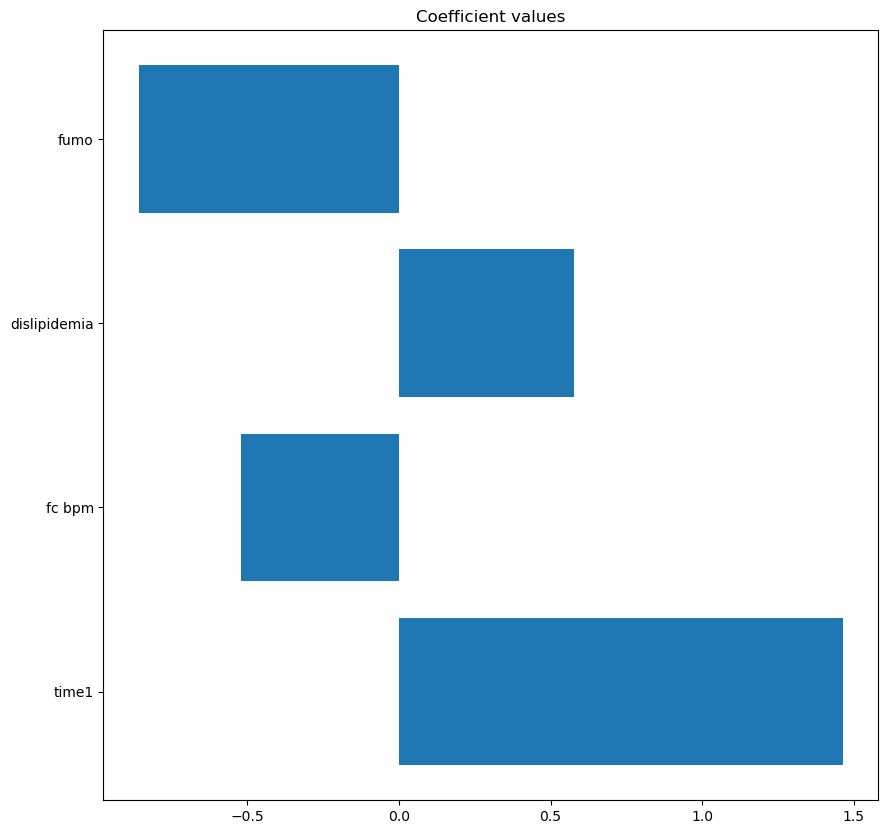

In [87]:
plt.figure(figsize=(10,10))
coef = np.sort(lr.named_steps['clf'].coef_[0])
plt.barh(test_set_raw.drop(columns=['classe']).columns, lr.named_steps['clf'].coef_[0])
plt.title("Coefficient values")
plt.show()

In [92]:
y_test_lr

array([[0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0]], dtype=int64)

In [90]:
## calcule f1 score for ogistic model

from sklearn.metrics import f1_score


y_pred = lr.predict(X_test_lr)
print(y_pred)
f1 = f1_score(y_test_lr, y_pred)
print(f1)

[0 0 0 0 1 1 1 1]
0.75


In [95]:
import pickle
# save the model to disk
filename = 'STEMI-NSTEMI-StdScaledLR_MODEL.sav'
pickle.dump(lr, open(filename, 'wb'))